In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target # 0:setosa, 1:versicolor, 2:virginica
df['target_names'] = df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

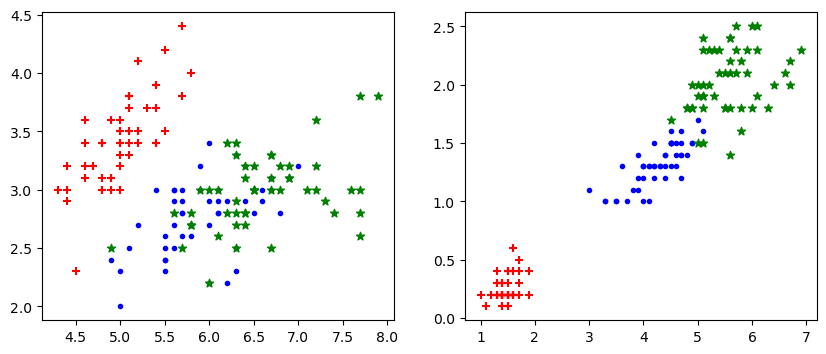

In [7]:
fig1,(sub1,sub2) = plt.subplots(ncols=2,figsize=(10,4))
sub1.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')
sub1.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')
sub1.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='*')

sub2.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')
sub2.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')
sub2.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',marker='*')

In [8]:
X = df.drop(['target','target_names'],axis=1)
X = X.values
Y = df.target.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.5,random_state=0)
print(len(X_train))
print(len(X_test))

75
75


In [9]:
svc = SVC(probability=True)  # support vector classifier
svc.fit(X_train,Y_train)

SVC(probability=True)

In [10]:
Yp_train = svc.predict(X_train)
print(svc.score(X_train,Y_train))
print(svc.predict_proba(X_train[:5]))
print(Yp_train[:5])
print(Y_train[:5])

0.96
[[0.94918731 0.03576221 0.01505048]
 [0.0182576  0.31403344 0.66770895]
 [0.16174911 0.8105486  0.02770229]
 [0.95975602 0.02650081 0.01374317]
 [0.0107598  0.88202957 0.10721062]]
[0 2 1 0 1]
[0 2 1 0 1]


In [11]:
Yp_test = svc.predict(X_test)
print(svc.score(X_test,Y_test))
print(svc.predict_proba(X_test[:5]))
print(Yp_test[:5])
print(Y_test[:5])

0.9466666666666667
[[0.01798106 0.12772874 0.8542902 ]
 [0.01754068 0.96821359 0.01424573]
 [0.96141341 0.02325092 0.01533567]
 [0.01610055 0.01728039 0.96661906]
 [0.95331583 0.03228998 0.01439419]]
[2 1 0 2 0]
[2 1 0 2 0]
